## Erick Iván Castro Granados 

## ITAM 

## CAPM


$$
    r_M \sim \mathcal{N}(\alpha + \beta r_A, \varepsilon) \ \forall A
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%config InlineBackend.figure_format = "retina"

In [4]:
port_path = "Prueba.xlsx"
market = pd.read_excel(port_path, index_col=0)

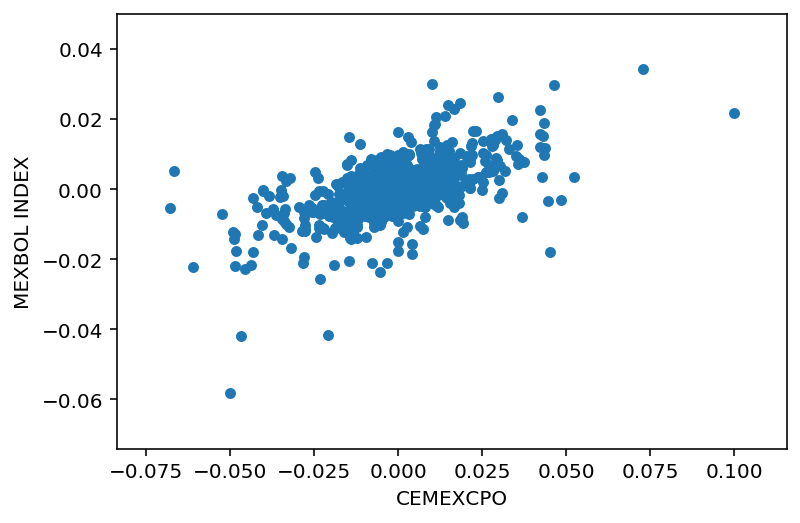

In [5]:
rets = market.pct_change().dropna(axis=0)
rets.columns = [col.replace(" MF Equity", "") for col in rets.columns]
rets.plot.scatter(x="CEMEXCPO", y="MEXBOL INDEX")

$$
    {\bf w} = (\Phi^T\Phi)^{-1} \Phi{\bf t}
$$

In [11]:
I = np.concatenate([np.identity(2)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

In [7]:
Phi = rets.iloc[:, :-1].values
t = rets.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

In [8]:
P = np.ones((N, M))
P = np.c_[P, Phi]

In [9]:
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([rets.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")

In [10]:
B.sort_values("beta", ascending=False)

param,alpha,beta
security,,
FEMSAUBD,-0.000168,0.460590
AMXL,-0.000176,0.432599
KOFUBL,0.000011,0.348460
GFNORTEO,-0.000170,0.305996
ASURB,-0.000141,0.300818
WALMEX*,-0.000256,0.294421
BBAJIOO,-0.000183,0.289782
AC*,-0.000002,0.288872
GAPB,-0.000232,0.287803


In [12]:
alpha, beta = B.loc["ASURB"]

In [13]:
from ipywidgets import interact

@interact(security=rets.columns[:-1])
def plot_capm(security):
    rets.plot.scatter(x=security, y="MEXBOL INDEX")
    sec = rets[security]
    x = np.linspace(sec.min(), sec.max(), 100)
    alpha, beta = B.loc[security]
    plt.title(rf"$\alpha={alpha:0.3f}$ | $\beta={beta:0.3f}$")
    plt.plot(x, alpha + beta * x, c="tab:orange", linewidth=4)

interactive(children=(Dropdown(description='security', options=('KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNOR…

## Optimización de los pesos

In [15]:
port_path = "PreciosPortf.xlsx"
data = pd.read_excel(port_path, index_col=0)

rend = data.pct_change().dropna()

rend_ports = rend.mean() * 252
rend_ports

ASURB MF Equity       0.123539
GFNORTEO MF Equity    0.078811
PE&OLES* MF Equity    0.111053
WALMEX* MF Equity     0.082426
IENOVA* MF Equity     0.078997
dtype: float64

In [16]:
rend.cov()

,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity
ASURB MF Equity,0.000224,0.000086,0.000061,0.000036,0.000044
GFNORTEO MF Equity,0.000086,0.000341,0.000094,0.000082,0.000082
PE&OLES* MF Equity,0.000061,0.000094,0.000548,0.000041,0.000045
WALMEX* MF Equity,0.000036,0.000082,0.000041,0.000215,0.000043
IENOVA* MF Equity,0.000044,0.000082,0.000045,0.000043,0.000226


In [17]:
weights = np.random.random(5)
weights /= sum(weights)
weights

array([0.0360603 , 0.41689774, 0.20296346, 0.12537965, 0.21869885])

In [18]:
sum(weights)

1.0

In [19]:
# rendimiento esperado (anualizado) de portafolio
(rend.mean() * weights).sum() * 252

0.0874619627583357

In [20]:
E_p = (rend.mean() @ weights) * 252
S_p = np.sqrt(weights.T @ (rend.cov() * 252) @ weights)

In [21]:
E_p, S_p

(0.0874619627583357, 0.1935424689034858)

In [22]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [23]:
port_rend(weights, rend), port_vol(weights, rend)

(0.0874619627583357, 0.1935424689034858)

In [24]:
weights_sim = np.random.random((5000, 5))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rend)
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rend)

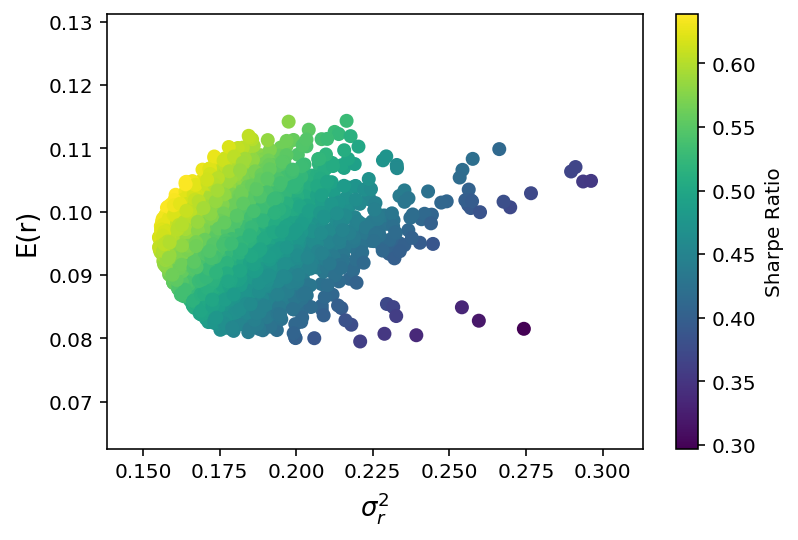

In [26]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

# Creando la frontera eficiente

$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
\end{aligned}
$$

## Optimización con una restricción
### 1) Suma de pesos = 1 

In [27]:
from scipy.optimize import minimize

In [28]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
port0

     fun: 0.15516189890166862
     jac: array([0.15509157, 0.1552039 , 0.15516055, 0.15517693, 0.15521053])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.28156355, 0.04428975, 0.08986005, 0.30804272, 0.27624393])

In [30]:
wp0 = port0.x
port_rend(wp0, rend), port_vol(wp0, rend)

(0.09546706554861212, 0.15516189890166862)

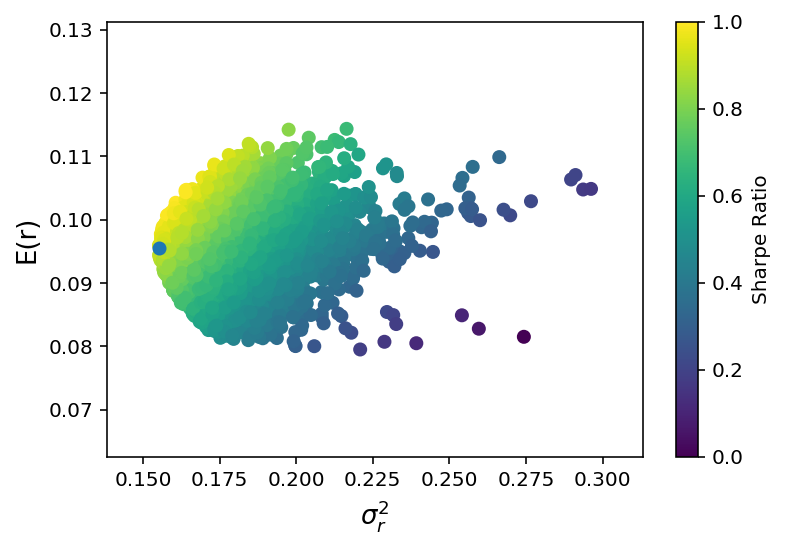

In [33]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp0, rend), port_rend(wp0, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

# Creamos la frontera eficiente

In [51]:
r_min = port_rend(wp0, rend)
r_max = rend_ports.max()

rend_max = np.linspace(r_min, r_max)

In [52]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
    ]
    port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt0 = port0.x
    pesos_optimos.append(w_opt0)

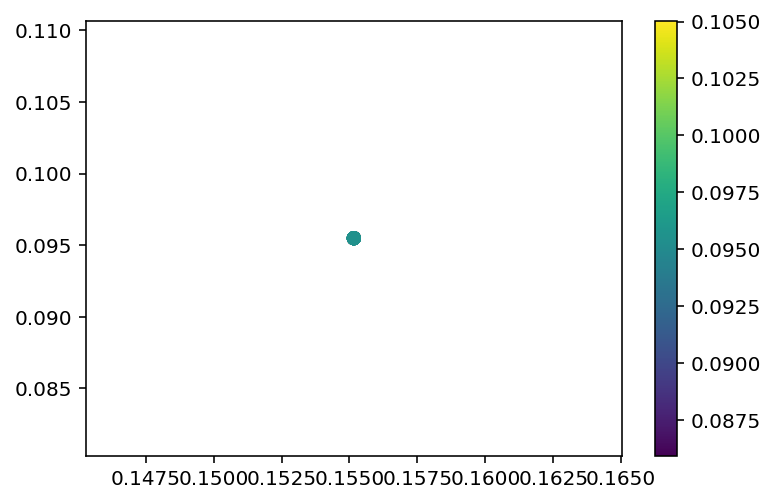

In [53]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

## Optimización con dos restricciones 
### 1) Suma de pesos = 1 
### 2) Rendimiento esperado

$$
\begin{aligned}
    \min \ &{\bf w}^T\Sigma {\bf w} \\
    s.t.\ & {\bf w}^T {\bf 1} = 1 \\
    &{\bf w}^T R_p = E
\end{aligned}
$$

In [34]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

e0 = 0.1
constraints = [
    {"type": "eq", "fun": sum_weights},
    {"type": "eq", "fun": lambda w: rend_esperado(w, e0)}
]

port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
port1

     fun: 0.1571519519543437
     jac: array([0.17770123, 0.13864066, 0.16717647, 0.14147473, 0.13904169])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.37258256, 0.0067859 , 0.10780294, 0.27788421, 0.23494439])

In [35]:
wp1 = port1.x
port_rend(wp1, rend), port_vol(wp1, rend)

(0.099999999997615, 0.1571519519543437)

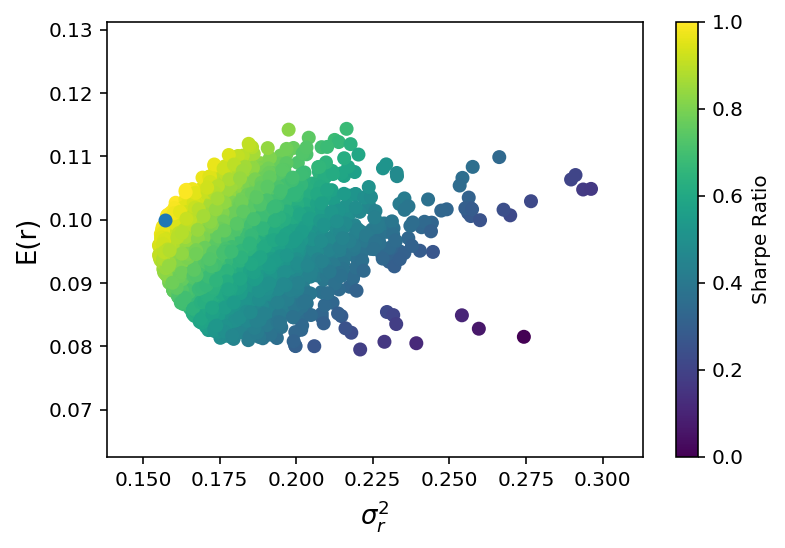

In [36]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp1, rend), port_rend(wp1, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

# Creamos la frontera eficiente

In [54]:
r_min = port_rend(wp1, rend)
r_max = rend_ports.max()

rend_max = np.linspace(r_min, r_max)

In [55]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]
    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt1 = port1.x
    pesos_optimos.append(w_opt1)

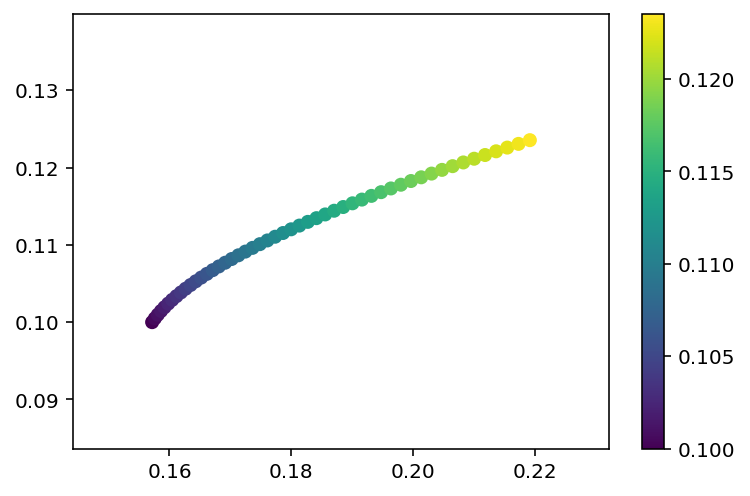

In [56]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

## Optimización con tres restricciones 
### 1) Suma de pesos = 1 
### 2) Rendimiento esperado
### 3) Volatilidad < 15%


In [96]:
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

def vol_restringida(w, R):
    return port_vol(w, rend) - R

e0 = 0.1
R = 0.15
constraints = [
    {"type": "eq", "fun": sum_weights},
    {"type": "eq", "fun": lambda w: rend_esperado(w, e0)},
    {"type": "ineq", "fun": lambda w: vol_restringida(w, R)}
]

port2 = minimize(port_vol, w0, constraints=constraints, args=rend)
port2

     fun: 0.15715180931513575
     jac: array([0.17778347, 0.13893076, 0.16687983, 0.14187598, 0.13856072])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.37279784, 0.00749811, 0.10736944, 0.27917911, 0.23315551])

In [97]:
wp2 = port2.x
port_rend(wp2, rend), port_vol(wp2, rend)

(0.10000000000056448, 0.15715180931513575)

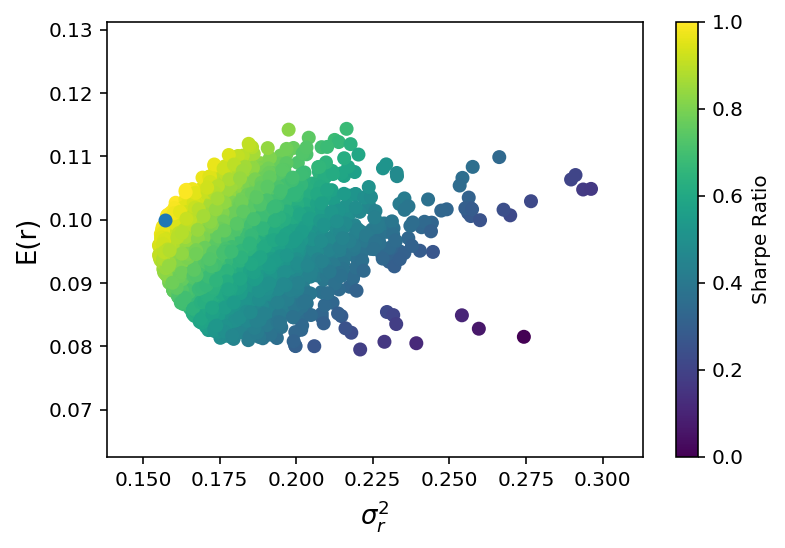

In [98]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp2, rend), port_rend(wp2, rend))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

# Creamos la frontera eficiente

In [99]:
r_min = port_rend(wp2, rend)
r_max = rend_ports.max()

rend_max = np.linspace(r_min, r_max)
vol_max = np.linspace(0,0.15)

In [100]:
pesos_optimos = []
for e,R in zip(rend_max,vol_max):
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)},
        {"type": "ineq", "fun": lambda w: vol_restringida(w, R)}
    ]
    port2 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port2.x
    pesos_optimos.append(w_opt)

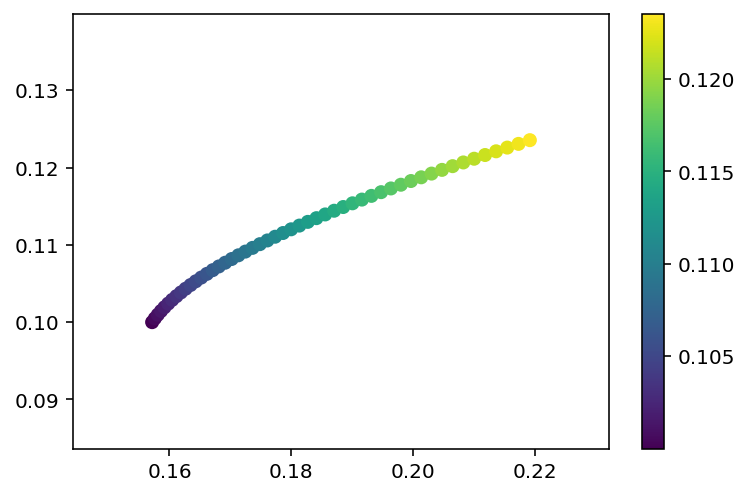

In [101]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

### Portafolio Tangencial

$$
    \mathbb{E}[R_C] = R_f + \frac{\mathbb{E}[R_p] - R_f}{\sigma_P}\sigma_C
$$

$$
\frac{\mathbb{E}[R_p] - R_f}{\sigma_P}
$$

In [40]:
rf = 0.06
def min_func_sharpe(weights):
    return - (port_rend(weights, rend) - rf) / port_vol(weights, rend)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [41]:
w_sharpe = f_sharpe.x

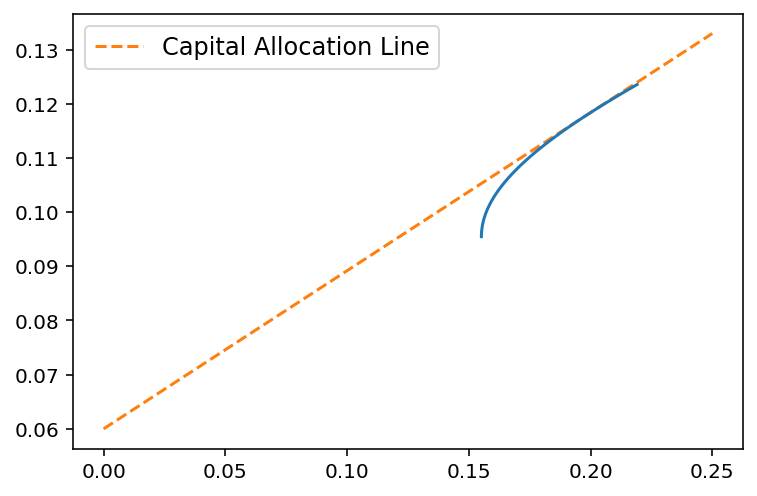

In [42]:
e_sharpe = port_rend(w_sharpe, rend)
vol_sharpe = port_vol(w_sharpe, rend)

sigma_c =  np.linspace(0, 0.25)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)